### Load IMDB data

In [9]:
from keras.datasets import imdb

In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [11]:
word_index = imdb.get_word_index()

In [14]:
reverse_word_index = dict([ (value, key) for (key, value) in word_index.items()])

In [25]:
review1 = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[2]])

In [26]:
review1

"? an actress making a movie in africa is kidnapped and taken into the jungle where she is held for ? the producer hires some one to go and bring her back ? everything are the cannibals in the jungle who worship a really ugly looking god who likes to eat naked women br br this is a gory sleazy movie there is ? amounts of nudity and violence not to mention violence against nude people its an exploitation film designed to appeal to the deepest darkest parts of our being and if the movie wasn't so boring this film would be a classic lets face it despite the gore the nasty sex and abuse and the ugly monster this movie is a ? the pacing is all off ? and it puts you out there are multiple plot lines that all seem to be happening ? from each other even though its ultimately all one story worst of all almost no one says anything most of the minimal dialog concerns the cruelty or one characters ? that i'll do what i want its such a quiet and dull movie that if it weren't for the frequent scream

### Prepare data

#### by turning each review into a vector of 0s and 1s, 1 indicating that a given word occurs in that review

In [20]:
import numpy as np

In [34]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # each word that occurs in a given sequence: 1, not occur: 0
        results[i, sequence] = 1.
    return results

In [44]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Build neural network model

In [19]:
from keras import models
from keras import layers

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compile model

In [42]:
from keras import optimizers
from keras import losses
from keras import metrics

In [43]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy]
              )

### Validating approach

In [49]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [50]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [51]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20, 
                    batch_size= 512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.5973 - acc: 0.6704 - val_loss: 0.5125 - val_acc: 0.8461
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.4290 - acc: 0.8761 - val_loss: 0.3819 - val_acc: 0.8759
Epoch 3/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2922 - acc: 0.9209 - val_loss: 0.3292 - val_acc: 0.8758
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2159 - acc: 0.9388 - val_loss: 0.2913 - val_acc: 0.8860
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1694 - acc: 0.9509 - val_loss: 0.3272 - val_acc: 0.8665
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1362 - acc: 0.9613 - val_loss: 0.2916 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1115 - acc: 0.9702 - val_loss: 0.3086 - 

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [60]:
epochs = range(1, len(loss_values) + 1)

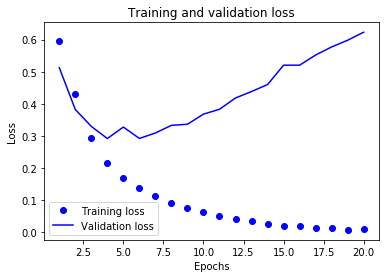

In [61]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

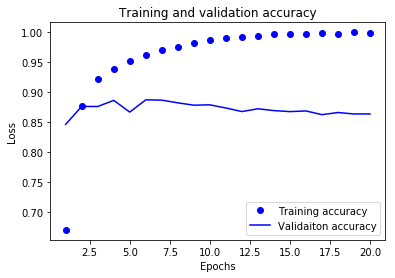

In [62]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validaiton accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Retrain a model from scratch for the optimal 4 epochs

In [63]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [65]:
model.fit(x_train,
                    y_train, 
                    epochs=4, 
                    batch_size= 512, 
                    validation_data=(x_val, y_val))

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.4781 - acc: 0.8231 - val_loss: 0.3198 - val_acc: 0.8994
Epoch 2/4
25000/25000 [==============================] - 3s 115us/step - loss: 0.2803 - acc: 0.9030 - val_loss: 0.2341 - val_acc: 0.9180
Epoch 3/4
25000/25000 [==============================] - 3s 116us/step - loss: 0.2091 - acc: 0.9268 - val_loss: 0.1703 - val_acc: 0.9443
Epoch 4/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.1742 - acc: 0.9370 - val_loss: 0.1418 - val_acc: 0.9545


In [66]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 100us/step


In [68]:
results # Gives test loss and accuracy

[0.28729455422401429, 0.88580000000000003]

In [69]:
model.predict(x_test) # Predict the likelihood of a review being positive

array([[ 0.18555823],
       [ 0.77239662],
       [ 0.78473097],
       ..., 
       [ 0.9991166 ],
       [ 0.11071164],
       [ 0.93650764]], dtype=float32)

In [70]:
' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

'? the last time i saw the movie i was around seven years so my opinions might be jaded over time at the time i enjoyed the filming that switched between cartoon and live action at the time i felt sad for the blue ? and his sad life also i felt glee when after captain ? kidnapped the heroine a princess or toy ? the tables the were turned on him unfortunately the producers never decided to transfer this movie to vhs so all i have are twenty year old memories i am sure that if i saw the movie again i would consider it corny and sappy but i really enjoyed it the movie at the time'

In [71]:
' '.join([reverse_word_index.get(i-3, '?') for i in train_data[-1]])

"? this impossible tale is of a female witch pursuing a mortal man in a mortal world her community is open among it's members but she ? her witchcraft from the ? ? this is starting to sound familiar lol it's not your typical movie very campy performances by jack lemmon and ernie ? keep things from getting dull kim novak is always a pleasure on screen but i found her pairing with james stewart unusual but not fatal to the story br br with re ? interest in all things ? and dark this film deserves to be discovered and re discovered by old and new audiences it's still a hoot"